In [1]:
#Standard useful libraries
import numpy as np
import scipy as sp
import pandas as pd

#For machine learning and TDA
import sklearn.datasets as sk
import gudhi as gd

#For graphs
import networkx as nx

#For plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

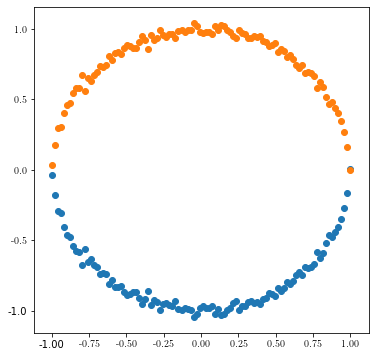

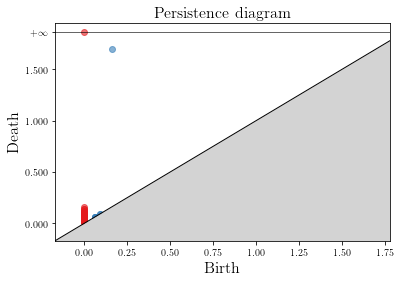

In [2]:
#Generate a circle of points and see how the persistent homology varies with noise
n = 100 #number of data points
r = 1.0 #Radius
x = np.linspace(-1.0, 1.0, n) #x points
y = np.sqrt(r**2 - x**2) + np.random.normal(0,0.025,n) #Calculated y points plus some noise

fig = plt.figure(figsize=(6,6))
plt.scatter(x,-y)
plt.scatter(x,y)

#List the points
coordinates = []
for i in range(0,n):
        coordinates.append((x[i],y[i]))
for i in range(0,n):
        coordinates.append((x[i],-y[i]))
        
#Make a distance matrix
dist_mat = sp.spatial.distance_matrix(coordinates,coordinates,p=2,threshold=10000) #p=2 for the 2-norm; threshhold just determines how python calculates for efficiency (I think)

#Make a simplical complex using the distance matrix
circle_rips = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=2.0)
circle_simplex = circle_rips.create_simplex_tree(max_dimension=2)

#Calculate the barcodes
circle_barcodes = circle_simplex.persistence()

#Calculate the diagram
gd.plot_persistence_diagram(circle_barcodes)

As a rule of thumb, points near the axis on the persistence diagram are noise. The features are born and die very quickly, and hence don't represent true underlying features.

We see a series of 0-dimensional features (the red dots) near the axis followed by one at infinity. 0-dimensional features are connected clusters, so this represents all the individual data points forming essentially a single cluster. The single blue dot is the 1-dimensional feature, ie. a loop. This is what we want to see because we have a circle. Hurrah! 

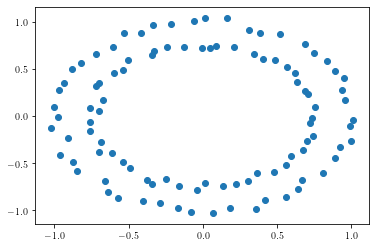

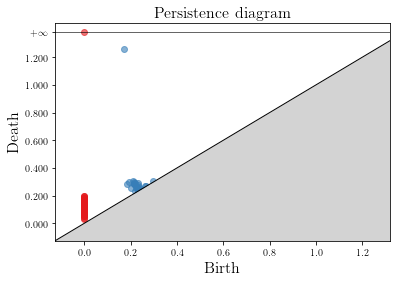

In [3]:
#Trying on slightly more complicated data sets
x, y = sk.make_circles(n_samples=100,noise=0.025,factor=0.75) #y is the classification labels, but don't worry about that for now
plt.scatter(x[:,0],x[:,1])

dist_mat_2circs = sp.spatial.distance_matrix(x,x,p=2,threshold=10000) #p=2 for the 2-norm; threshhold just determines how python calculates for efficiency (I think)

#Make a simplical complex using the distance matrix
_2circs_rips = gd.RipsComplex(distance_matrix=dist_mat_2circs,max_edge_length=2.0)
_2circs_simplex = _2circs_rips.create_simplex_tree(max_dimension=2)

#Calculate the barcodes
_2circs_barcodes = _2circs_simplex.persistence()

#Calculate the diagram
gd.plot_persistence_diagram(_2circs_barcodes)

It's a bit more difficult to pick out the fact that there are two loops in this diagram from the persistency diagram alone, made much more difficult by how close together these are. What we really need is a way to distinguish the noise (values close to the diagonals) from the genuine topological features. This is where the bottleneck distance comes in.

To be continued!

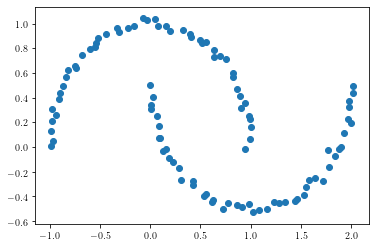

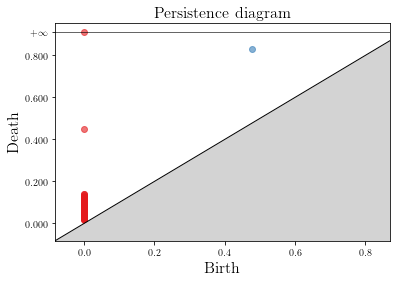

In [4]:
#Moon and Moon
x, y = sk.make_moons(n_samples=100,noise=0.025)
plt.scatter(x[:,0],x[:,1])

dist_mat_moons = sp.spatial.distance_matrix(x,x,p=2,threshold=10000) #p=2 for the 2-norm; threshhold just determines how python calculates for efficiency (I think)

#Make a simplical complex using the distance matrix
moons_rips = gd.RipsComplex(distance_matrix=dist_mat_moons,max_edge_length=4.0)
moons_simplex = moons_rips.create_simplex_tree(max_dimension=2)

#Calculate the barcodes
moons_barcodes = moons_simplex.persistence()

#Calculate the diagram
gd.plot_persistence_diagram(moons_barcodes)

It's interesting how the diagram identifies a loop in the structure of the data, when it's supposed to represent two separate but 'swirled' data sets. It would be helpful if there was a way to visualise the balls around each data point at the different lengths. From looking at it, you could assume the loop is being formed in the centre of the data, where the ends of each moon are almost touching the middle of the other cluster.

We also have an example of how two different clusters will show up on the 0-dimensional points of the diagram. Let's see how this looks with multiple clusters.

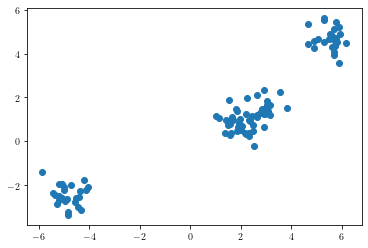

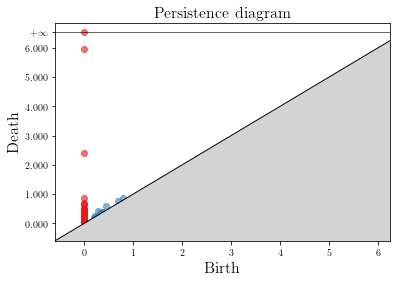

In [5]:
#Blobs
x, y = sk.make_blobs(n_samples=100,centers=4,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1])

dist_mat_blobs = sp.spatial.distance_matrix(x,x,p=2,threshold=10000) #p=2 for the 2-norm; threshhold just determines how python calculates for efficiency (I think)

#Make a simplical complex using the distance matrix
blobs_rips = gd.RipsComplex(distance_matrix=dist_mat_blobs,max_edge_length=15.0)
blobs_simplex = blobs_rips.create_simplex_tree(max_dimension=2)

#Calculate the barcodes
blobs_barcodes = blobs_simplex.persistence()

#Calculate the diagram
gd.plot_persistence_diagram(blobs_barcodes)

The inference here would be that the number of 0-dimensional clusters on the diagram that aren't noise is captured, with the nth cluster being the infinity point. If the blobs were overlapping then it's difficult to justify counting them as separate blobs from a topological standpoint.

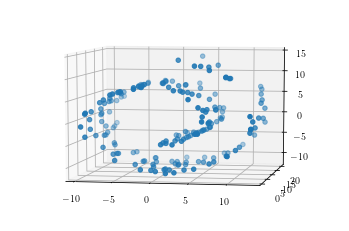

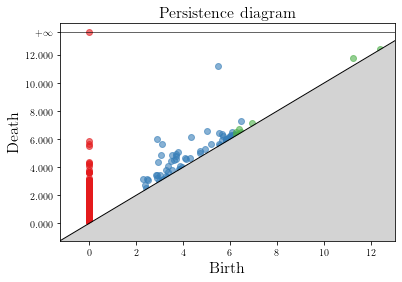

In [27]:
#Let's try 3d!
x, y = sk.make_swiss_roll(n_samples=200,noise=0.05)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)

ax.scatter(x[:,0],x[:,1],x[:,2], zdir='z', s=20, c=None, depthshade=True)

dist_mat_swiss = sp.spatial.distance_matrix(x,x,p=3,threshold=10000) #p=3 for the 3-norm

#Make a simplical complex using the distance matrix
swiss_rips = gd.RipsComplex(distance_matrix=dist_mat_swiss,max_edge_length=15.0)
swiss_simplex = swiss_rips.create_simplex_tree(max_dimension=3)

#Calculate the barcodes
swiss_barcodes = swiss_simplex.persistence()

#Calculate the diagram
gd.plot_persistence_diagram(swiss_barcodes)

3d is trickier to interpret, but if you unpick the data, it's essentailly one flat cluster rolled up. This could explain the behaviour of the 0-d features and the single notable 1-d feature. Considering there's no boundaries on the ends of this roll could explain the lack of notable 2-d features, too. This also indicates that there's a lot of interpretation when it comes to persistent homologies, that complicate its usage. However, what's normally difficult to interpret for humans can be a lot more interpretable for machines.